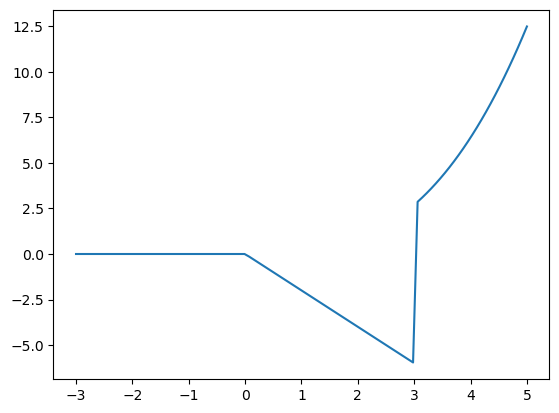

In [ ]:
############# PIECEWISE FUNCTIONS #################

# implementing piecewise functions with numpy and sympy

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# define some x-axis points - linear spaced nums between -3 and 5 with 100 steps
xx = np.linspace(-3,5,100)

### CASES/PIECES OF A PIECEWISE FUNCTION ###

# first part of the piece is the rule, and then the condition. 
# The condition is a bool conversion (i.e. (xx < 0)) and the rule will be run on it if true and the number calculated in the array output, otherwise the output will be 0. for that element in the array (xx)


         #rule      #condition/subdomain
piece1 = 0        * (xx < 0) # results in all 0s (because of the 0 *): xx < 0 takes all the nums in the linspace array and converts to boolean based on the condition

piece2 = -2*xx    * ((xx >= 0) & (xx < 3)) # two conditionals

piece3 = xx**3/10 * (xx >= 3) # rule run only where the x values are gte 3

# Now we can stitch the pieces together to get the final function, and show the plot
y = piece1+piece2+piece3 # combine the outputs into one array and plot against the original inputs xx
plt.plot(xx,y)
plt.show()

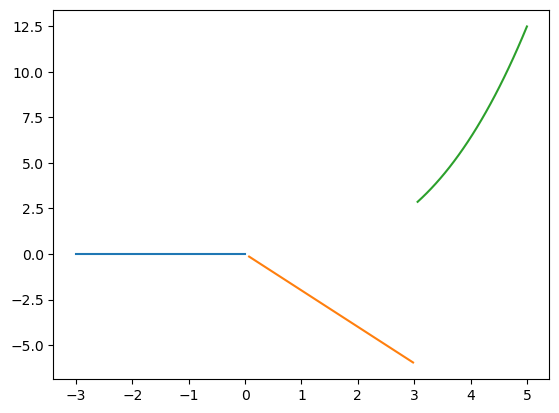

In [ ]:
#### Plot the different pieces of a piecewise function separately ####

# optionally, you can implement the piecewise function directly in the plot command

# plot the inputs (xx) using the conditional/subdomain index and run the rule (function) in the y-axis argument
  ## plot(xx[cond/subdomain], rule[condition]) - NOTE: you need to make sure to index the y output (second argument) the same way so you don't get an error for mismatch in elements (indexed xx vs. all of xx run in the function)
plt.plot(xx[xx < 0], np.zeros(len(xx[xx < 0])), label='Piece 1')

## Alternative way to output piece 1 - use np.sum() <- when you pass in numpy boolean arrays (resulting from the condition/subdomain), it converts them to 1s and 0s
# plt.plot(xx[xx < 0], np.zeros(np.sum(xx < 0)), label='Piece 1') # produces number of 0s matching the Trues

# plot the next piece (2)
plt.plot(xx[(xx >= 0) & (xx < 3)], -2*xx[(xx >= 0) & (xx < 3)], label='Piece 2')

plt.plot(xx[xx >= 3], xx[xx >= 3]**3/10, label='Piece 3')

plt.show()

<IPython.core.display.Math object>

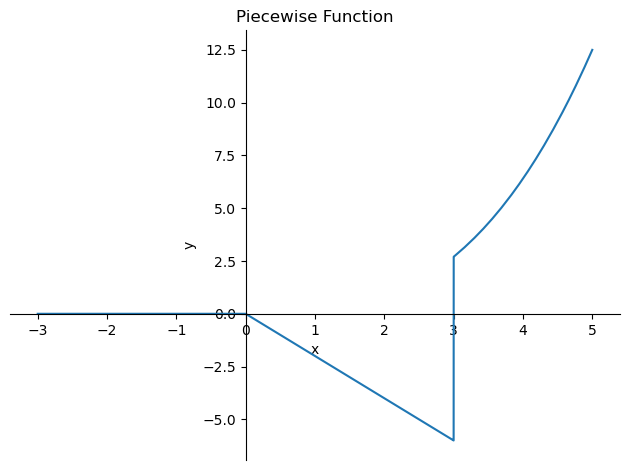

In [ ]:
##### USING SYMPY WITH PIECEWISE FUNCTIONS #####

# there will be differences in sympy's plotting engine from matplotlib's plotting engine
from IPython.display import display, Math
from sympy import latex

from sympy.abc import x # get a symbolic variable x

# define the rules of the piecewise function using the symbolic variable
piece1 = 0
piece2 = -2*x
piece3 = x**3/10

# pass in each piece as a separate tuple - the rule, the subdomain/condition
fx = sym.Piecewise( (piece1, x<0), (piece2, (x>=0)&(x<3)), (piece3, x>=0) )

# sympy will prioritize earlier pieces listed first (i.e. any number < 0 goes for first piece, and not the second piece/
display(Math(f'f(x) = {latex(fx)}'))

# plot with sympy
# add a second input to the plot function to specify the x-axis domain (-3 to 5 in the data defined in xx above) - otherwise the plot will automatically add a arbitrary x-axis range
sym.plot(fx, (x, xx[0], xx[-1]), title='Piecewise Function', xlabel='x', ylabel='y') # second arg: the range of x goes from the first element in xx to the last element in xx


[-3.         -2.91919192 -2.83838384 -2.75757576 -2.67676768 -2.5959596
 -2.51515152 -2.43434343 -2.35353535 -2.27272727 -2.19191919 -2.11111111
 -2.03030303 -1.94949495 -1.86868687 -1.78787879 -1.70707071 -1.62626263
 -1.54545455 -1.46464646 -1.38383838 -1.3030303  -1.22222222 -1.14141414
 -1.06060606 -0.97979798 -0.8989899  -0.81818182 -0.73737374 -0.65656566
 -0.57575758 -0.49494949 -0.41414141 -0.33333333 -0.25252525 -0.17171717
 -0.09090909 -0.01010101  0.07070707  0.15151515  0.23232323  0.31313131
  0.39393939  0.47474747  0.55555556  0.63636364  0.71717172  0.7979798
  0.87878788  0.95959596  1.04040404  1.12121212  1.2020202   1.28282828
  1.36363636  1.44444444  1.52525253  1.60606061  1.68686869  1.76767677
  1.84848485  1.92929293  2.01010101  2.09090909  2.17171717  2.25252525
  2.33333333  2.41414141  2.49494949  2.57575758  2.65656566  2.73737374
  2.81818182  2.8989899   2.97979798  3.06060606  3.14141414  3.22222222
  3.3030303   3.38383838  3.46464646  3.54545455  3.6

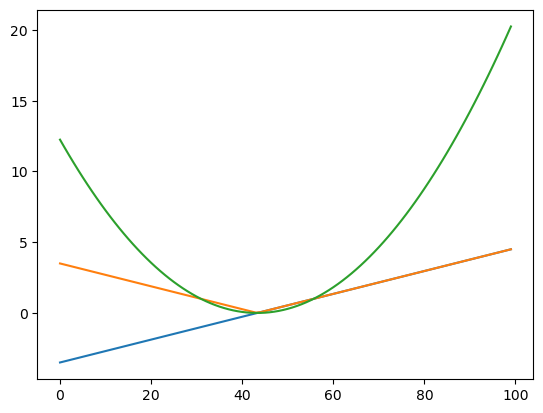

index of the closest val in xx to 0.5: 43
answer: the output of the function when x = .5 is APPROXIMATELY: -0.9494949494949498


In [ ]:
############ EVALUATING A FUNCTION AT OR NEAR A POINT #################
  ### A lesson on working with math in computers using numpy ###

# Evaluate a function when x (the input) is equal to a specific value, i.e. f(.5)

# if we want to know the value of y when xx == 0.5, looking at the numpy array we can see that xx (the numpy arr) never equals 0.5
print(xx)  # linear spaced nums with only 100 steps, so we don't have 0.5 in xx

# How can we find a value that is as close as possible to a specific value in a numpy array
  # Often in scenarios you will not have control over the steps or data and need to make approximations
  # This explores some ways to do that

xloc = .5 # the target input - QUESTION: What is the output of the function when x = .5?
# NOTE: this input value falls into Rule 2 (the second case, -2x) in the piecewise function defined

# subtract the target from the values
plt.plot(xx - xloc) # the y-axis tick (output) in the plot closest to 0 is the val closest to .5
# another way is to take the absolute value and look for the minimum
plt.plot(np.abs(xx-xloc))
## or square the subtraction and look at the minimum for the closest point to .5
plt.plot((xx-xloc)**2)

plt.show()

# find the minimum of the function to get the element (it's index) that has a value closest to .5
xidx = np.argmin((xx-xloc)**2)
print(f'index of the closest val in xx to {xloc}: {xidx}') # idx 43 in xx the closest to the target of .5

print(f'answer: the output of the function when x = .5 is APPROXIMATELY: {y[xidx]}') # the output of the function when x is .5 is here an approximation using the closest value of x we could find above

# The correct answer is -1 and you will see that you get an approximate answer to -1, and it gets closer as you increase resolution (increase the steps in np.linspace(-3,5,1000))



In [ ]:
###### USING SYMPY, WHAT IS THE OUTPUT OF A FUNCTION GIVEN A SPECIFIC INPUT #####

# This is easier to handle using Sympy over Numpy as we saw above
xloc = .5

print(f'f(x) when x = .5: {fx.subs(x, xloc)}') # substitute the input (symbolic variable x) with the target .5

# Note how we get a direct answer of -1

# *** IMPORTANT ***
# Sympy encodes the piecewise function as a symbolic expression, instead of a list of specified numbers as with numpy


f(x) when x = .5: -1.00000000000000
